
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### I have chosen the "TMDb movie data" and the purpose is to analyse the relatioship between the budget and the profit and analyze  which genre has released higher movies. The dataset has 21 variables, data collected  from 1960 to 2015. 


In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Loading dataset
df=pd.read_csv('tmdb-movies.csv')

# Display first five rows of data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# returning rows of the dimensions of the dataframe
df.shape

(10866, 21)

In [5]:
# Returning the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Displaying summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#summary of statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#Cheching the min and max year of dataset
df.release_year.min(), df.release_year.max()

(1960, 2015)


### Data Cleaning (Data Preparation)

In [9]:
# checking duplicates
sum(df.duplicated())

1

In [10]:
# delete duplictes row
df.drop_duplicates(inplace=True)

In [11]:
# checking that there is no duplicate rows
sum(df.duplicated())

0

In [12]:
#checking missing values in different coulumns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [14]:
#drop unnecessary columns
df1=df.drop(['id','imdb_id','cast','homepage','tagline','overview','keywords','budget_adj','revenue_adj',],axis=1)

In [15]:
df1.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [16]:
# changes columns data types

In [17]:
# drop the null values 
df1.dropna(inplace=True)

In [18]:
df1.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float64
 1   budget                9806 non-null   int64  
 2   revenue               9806 non-null   int64  
 3   original_title        9806 non-null   object 
 4   director              9806 non-null   object 
 5   runtime               9806 non-null   int64  
 6   genres                9806 non-null   object 
 7   production_companies  9806 non-null   object 
 8   release_date          9806 non-null   object 
 9   vote_count            9806 non-null   int64  
 10  vote_average          9806 non-null   float64
 11  release_year          9806 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 995.9+ KB


In [20]:
# changes columns data types
df1['revenue']=df1['revenue'].astype(float)
df1['budget']=df1['budget'].astype(float)
df1['release_date'] = pd.to_datetime(df1['release_date'])


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9806 non-null   float64       
 1   budget                9806 non-null   float64       
 2   revenue               9806 non-null   float64       
 3   original_title        9806 non-null   object        
 4   director              9806 non-null   object        
 5   runtime               9806 non-null   int64         
 6   genres                9806 non-null   object        
 7   production_companies  9806 non-null   object        
 8   release_date          9806 non-null   datetime64[ns]
 9   vote_count            9806 non-null   int64         
 10  vote_average          9806 non-null   float64       
 11  release_year          9806 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 995.9+ 

In [22]:
# adding new column called profit 
df1['profit']=df1['revenue']-df1['budget']

In [23]:
df1.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what are the variables that are correlated  with the profit)

In [24]:
#correlation of variables
df1.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
popularity,1.000000,0.539235,0.662553,0.157111,0.803009,0.236804,0.110195,0.629455
budget,0.539235,1.000000,0.731344,0.215109,0.627246,0.094172,0.137539,0.566250
revenue,0.662553,0.731344,1.000000,0.183595,0.788615,0.190261,0.071295,0.976258
runtime,0.157111,0.215109,0.183595,1.000000,0.184338,0.185408,-0.131908,0.153562
vote_count,0.803009,0.627246,0.788615,0.184338,1.000000,0.277974,0.124205,0.753853
vote_average,0.236804,0.094172,0.190261,0.185408,0.277974,1.000000,-0.137499,0.200028
release_year,0.110195,0.137539,0.071295,-0.131908,0.124205,-0.137499,1.000000,0.042479
profit,0.629455,0.566250,0.976258,0.153562,0.753853,0.200028,0.042479,1.000000


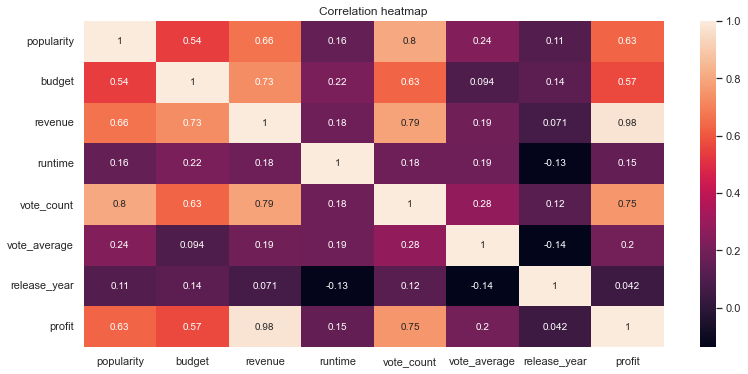

In [25]:
#correlation of different variables using heatmap
ax=plt.axes
sns.set(rc={'figure.figsize':(13,6)})
p=sns.heatmap(df1.corr(), annot=True,  annot_kws={"size": 10})
p.set_title('Correlation heatmap')
plt.show()


## The above graph shows that profit has a correlation with revenue, popularity, budget, and vote count, indicating that those are variables you can rely on when investing in movies. However, the graph also shows that profit has a low correlation with variables like runtime, vote_average, and release_year.

### Research Question 2  (Which genre type that  has high release)

In [26]:
#function that contatinate and count the genre type
def genre_type(genre):
    types=df1[genre].str.cat(sep = '|')
    df2= pd.Series(types.split('|'))
    count=df2.value_counts(ascending=True)
    return count

counts=genre_type('genres')

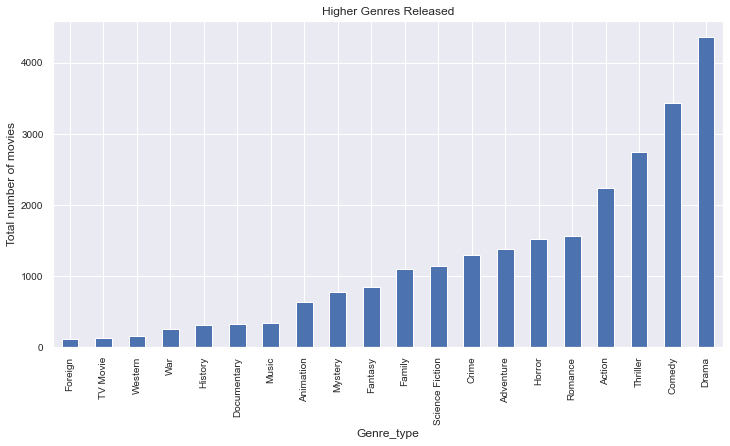

In [27]:
counts.plot(kind='bar',fontsize=10,figsize = (12,6))
plt.title("Higher Genres Released")
plt.xlabel('Genre_type')
plt.ylabel("Total number of movies")
plt.show()

### This above graph shows that the drama and comedy are the highest released movies and aslo, shows that Foreign and TV Movies are lowest released movies.

<a id='conclusions'></a>
## Conclusions

###  In conclusion, I can say to get the high profit for movies it require to invest more money and movies must be popular and the drama and comedy are most released genre types of movies.


# Limitations

### There are many factors that contribute to the profit generated by movies that are not included in the dataset, such as the resolution of the movie, the languages into which it has been translated, whether or not the movie has subtitles and whether or not the movie has been advertised.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-TMDb-movie-data-gildas-habimana'])

1